# Smart Home General
This notebook analyzes the general smart home data from the questionnaire

INFO:__main__:Data Before:
[[5, 1, 3, 4, 6, 4, 4, 6, 4], [5, 6, 4, 4, 2, 4, 2, 5, 4], [6, 5, 5, 5, 6, 5, 6, 5, 5], [4, 6, 5, 4, 1, 6, 2, 5, 6], [2, 5, 3, 2, 1, 3, 2, 6, 3], [4, 4, 2, 3, 2, 3, 1, 2, 4], [3, 3, 2, 3, 2, 2, 2, 5, 2], [3, 3, 2, 2, 1, 2, 2, 6, 2]]
INFO:__main__:Data After:
[[5, 3, 4, 4, 6, 5, 4, 6, 5], [6, 6, 4, 4, 2, 5, 2, 4, 5], [5, 4, 3, 5, 6, 4, 6, 5, 3], [6, 6, 2, 4, 1, 5, 1, 4, 3], [4, 5, 3, 5, 1, 4, 3, 5, 5], [2, 6, 2, 3, 2, 3, 2, 2, 3], [4, 3, 4, 4, 3, 4, 4, 4, 4], [4, 3, 3, 4, 1, 3, 4, 5, 3]]
INFO:__main__:Combined Data:
[[5, 1, 3, 4, 6, 4, 4, 6, 4], [5, 3, 4, 4, 6, 5, 4, 6, 5], [5, 6, 4, 4, 2, 4, 2, 5, 4], [6, 6, 4, 4, 2, 5, 2, 4, 5], [6, 5, 5, 5, 6, 5, 6, 5, 5], [5, 4, 3, 5, 6, 4, 6, 5, 3], [4, 6, 5, 4, 1, 6, 2, 5, 6], [6, 6, 2, 4, 1, 5, 1, 4, 3], [2, 5, 3, 2, 1, 3, 2, 6, 3], [4, 5, 3, 5, 1, 4, 3, 5, 5], [4, 4, 2, 3, 2, 3, 1, 2, 4], [2, 6, 2, 3, 2, 3, 2, 2, 3], [3, 3, 2, 3, 2, 2, 2, 5, 2], [4, 3, 4, 4, 3, 4, 4, 4, 4], [3, 3, 2, 2, 1, 2, 2, 6, 2], [4, 3, 3, 4, 1, 

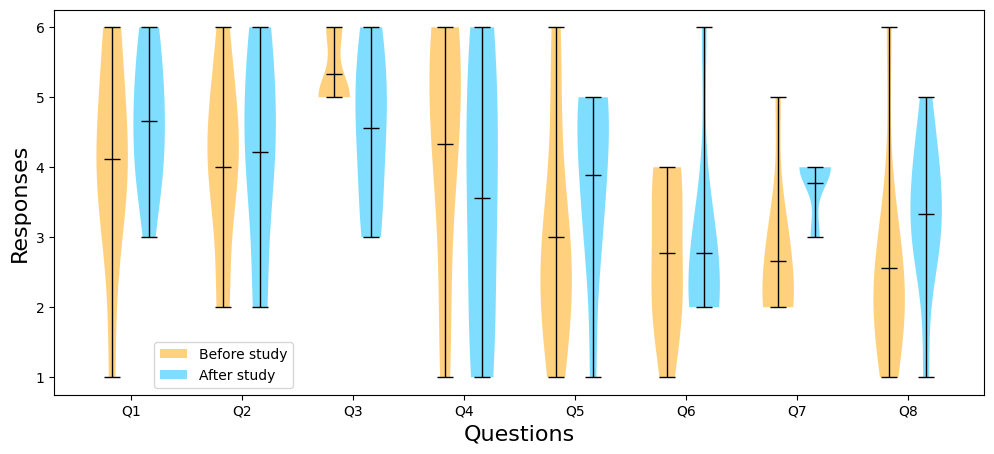

In [1]:
import logging
import matplotlib.pyplot as plt
import pandas as pd

# Constants
SPACE_BETWEEN_GROUPS = 1
INCLUDE_KARIN = True

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to read and process data
def read_and_process_data(filepath, include_karin):
    data = pd.read_csv(filepath, header=None)
    if not include_karin:
        data.drop(columns=[1], inplace=True)
    return data.values.tolist()

# Import and process data
data_before = read_and_process_data('data/general_questions/before.csv', INCLUDE_KARIN)
data_after = read_and_process_data('data/general_questions/after.csv', INCLUDE_KARIN)

logger.info(f"Data Before:\n{data_before}")
logger.info(f"Data After:\n{data_after}")

# Prepare combined data and positions for the violin plot
data_combined = []
violin_positions = []
label_positions = []

for i in range(len(data_before)):
    data_combined.extend([data_before[i], data_after[i]])
    violin_positions.extend([i * 2 + 1 + i * SPACE_BETWEEN_GROUPS, i * 2 + 2 + i * SPACE_BETWEEN_GROUPS])
    label_positions.append(i * 2 + 1.5 + i * SPACE_BETWEEN_GROUPS)
    
logger.info(f"Combined Data:\n{data_combined}")

# Customize the x-tick labels
tick_labels = [f'Q{i+1}' for i in range(len(data_before))]

# Create a violin plot
plt.figure(figsize=(12, 5))
violins = plt.violinplot(data_combined, positions=violin_positions, widths=0.85, showmeans=True)

colors = ['orange', 'deepskyblue']
for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(colors[i % 2])
    pc.set_alpha(0.5)
    
# Customize the color of the lines
for partname in ('cmedians', 'cmeans', 'cmins', 'cmaxes', 'cbars'):
    vp = violins.get(partname)
    if vp:
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

plt.xticks(label_positions, tick_labels)

plt.xlabel('Questions', fontsize=16)
plt.ylabel('Responses', fontsize=16)

# Add legend for the colors
# plt.legend(['Before study', 'After study'], loc='upper left', bbox_to_anchor=(0, -0.15))
plt.legend(['Before study', 'After study'], loc='lower left', bbox_to_anchor=(0.1, 0))


# Save as PDF
plt.savefig(f"output/general_questions_with{'' if INCLUDE_KARIN else 'out'}_karin.pdf", format='pdf')
plt.show()

In [4]:
from scipy.stats import ttest_rel
import pandas as pd

# Load your data again in case it's modified in the previous cell
data_before = pd.read_csv('data/general_questions/before.csv', header=None)
data_after = pd.read_csv('data/general_questions/after.csv', header=None)

# Variable to include or exclude participant 2
INCLUDE_KARIN = True

# Prepare the data according to INCLUDE_KARIN
if not INCLUDE_KARIN:
    # Exclude participant 2 (column index 1)
    data_before = data_before.drop(columns=[1])
    data_after = data_after.drop(columns=[1])

# Perform paired t-tests
results = []
for i in range(data_before.shape[0]):  # Iterate over rows (questions)
    before = data_before.iloc[i, :]
    after = data_after.iloc[i, :]
    t_stat, p_value = ttest_rel(before, after)
    results.append({'Question': f'Q{i+1}', 't-statistic': t_stat, 'p-value': p_value})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

  Question  t-statistic   p-value
0       Q1    -2.294157  0.050933
1       Q2    -1.000000  0.346594
2       Q3     2.800000  0.023198
3       Q4     1.492405  0.173939
4       Q5    -2.100903  0.068841
5       Q6     0.000000  1.000000
6       Q7    -3.162278  0.013349
7       Q8    -2.400980  0.043111


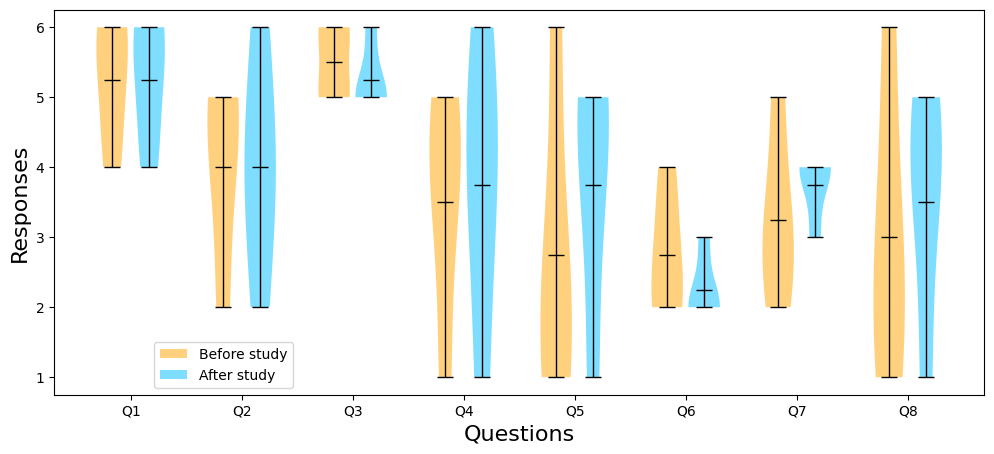

In [1]:
import logging
import matplotlib.pyplot as plt
import pandas as pd

# Constants
SPACE_BETWEEN_GROUPS = 1
INCLUDE_PASSENGER = True
INCLUDE_PILOT = True

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Function to read and process data
def read_and_process_data(filepath):
    data = pd.read_csv(filepath, header=None)
    if not INCLUDE_PASSENGER:
        data.drop(columns=[1, 2, 5, 6, 8], inplace=True)
    if not INCLUDE_PILOT:
        data.drop(columns=[0, 3, 4, 7], inplace=True)
    return data.values.tolist()

# Import and process data
data_before = read_and_process_data('data/general_questions/before.csv')
data_after = read_and_process_data('data/general_questions/after.csv')


# Prepare combined data and positions for the violin plot
data_combined = []
violin_positions = []
label_positions = []

for i in range(len(data_before)):
    data_combined.extend([data_before[i], data_after[i]])
    violin_positions.extend([i * 2 + 1 + i * SPACE_BETWEEN_GROUPS, i * 2 + 2 + i * SPACE_BETWEEN_GROUPS])
    label_positions.append(i * 2 + 1.5 + i * SPACE_BETWEEN_GROUPS)
    

# Customize the x-tick labels
tick_labels = [f'Q{i+1}' for i in range(len(data_before))]

# Create a violin plot
plt.figure(figsize=(12, 5))
violins = plt.violinplot(data_combined, positions=violin_positions, widths=0.85, showmeans=True)

colors = ['orange', 'deepskyblue']
for i, pc in enumerate(violins['bodies']):
    pc.set_facecolor(colors[i % 2])
    pc.set_alpha(0.5)
    
# Customize the color of the lines
for partname in ('cmedians', 'cmeans', 'cmins', 'cmaxes', 'cbars'):
    vp = violins.get(partname)
    if vp:
        vp.set_edgecolor('black')
        vp.set_linewidth(1)

plt.xticks(label_positions, tick_labels)

plt.xlabel('Questions', fontsize=16)
plt.ylabel('Responses', fontsize=16)

# Add legend for the colors
plt.legend(['Before study', 'After study'], loc='lower left', bbox_to_anchor=(0.1, 0))

# Save as PDF
plt.savefig(f"output/general_questions_{'PASSENGER' if INCLUDE_PASSENGER else ''}{'_PILOT' if INCLUDE_PILOT else ''}.pdf", format='pdf')

plt.show()

In [1]:
from scipy.stats import ttest_rel
import pandas as pd

# Load your data again in case it's modified in the previous cell
data_before = pd.read_csv('data/general_questions/before.csv', header=None)
data_after = pd.read_csv('data/general_questions/after.csv', header=None)

# Variable to include or exclude participant 2
INCLUDE_PASSENGER = True
INCLUDE_PILOT = True

if not INCLUDE_PASSENGER:
    data_before = data_before.drop(columns=[1, 2, 5, 6, 8])
    data_after = data_after.drop(columns=[1, 2, 5, 6, 8])

if not INCLUDE_PILOT:
    data_before = data_before.drop(columns=[0, 3, 4, 7])
    data_after = data_after.drop(columns=[0, 3, 4, 7])

# Perform paired t-tests
results = []
for i in range(data_before.shape[0]):  # Iterate over rows (questions)
    before = data_before.iloc[i, :]
    after = data_after.iloc[i, :]
    t_stat, p_value = ttest_rel(before, after)
    results.append({'Question': f'Q{i+1}', 't-statistic': t_stat, 'p-value': p_value})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

  Question  t-statistic   p-value
0       Q1          NaN       NaN
1       Q2     0.000000  1.000000
2       Q3     1.000000  0.391002
3       Q4    -0.397360  0.717686
4       Q5    -1.095445  0.353387
5       Q6     1.000000  0.391002
6       Q7    -1.000000  0.391002
7       Q8    -0.774597  0.495025
